In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel(r'C:\Users\Dotsenko.Semen\Downloads\data.xlsx',sheet_name='retail',usecols=[i for i in range(0,8)])

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,54214.000000,54214.000000,40643.000000
mean,9.610802,4.307341,15283.422803
std,57.358422,47.834496,1707.982278
min,-9600.000000,0.000000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16775.000000
max,2400.000000,6930.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null datetime64[ns]
UnitPrice      54214 non-null float64
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
54213,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Удаляю подарки и списания. Подарков очень мало, чтобы они имели какое либо значение в этой выборке
df = df[df['Quantity'] >= 1]
df = df[df['UnitPrice'] > 0]

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,53029.000000,53029.000000,39718.000000
mean,10.421147,3.835168,15290.827937
std,37.629879,17.814690,1708.117360
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13971.000000
50%,3.000000,2.100000,15159.000000
75%,11.000000,4.130000,16782.000000
max,2400.000000,1687.170000,18287.000000


In [226]:
# Количество уникальных пользователей
df['CustomerID'].nunique()

3792

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53029 entries, 0 to 54213
Data columns (total 11 columns):
InvoiceNo      53029 non-null object
StockCode      53029 non-null object
Description    53029 non-null object
Quantity       53029 non-null int64
InvoiceDate    53029 non-null object
UnitPrice      53029 non-null float64
CustomerID     39718 non-null float64
Country        53029 non-null object
mnth_yr        53029 non-null period[M]
weekday        53029 non-null object
UnitSum        53029 non-null float64
dtypes: float64(3), int64(1), object(6), period[M](1)
memory usage: 7.4+ MB


In [5]:
# Добавлю колонку месяц-год и день недели для дальнейших расчетов,количество проданных артикулов
df['InvoiceDate'] = df['InvoiceDate'].dt.normalize()
df['mnth_yr'] = df['InvoiceDate'].dt.to_period('M')
df['weekday'] = df['InvoiceDate'].dt.day_name()


In [234]:
# Странно, но одного дня в аналитике не хватает
df['weekday'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [6]:
# Добавлю колонку с итогом за позицию в чеке
df['UnitSum'] = df['Quantity']*df['UnitPrice']

In [35]:
# Создаем таблицу с продажами по странам
import matplotlib.pyplot as plt
import pylab
countries = df[['Country','UnitSum','Quantity','mnth_yr']]
countries['UK'] = countries['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Other country' )
countries = countries.groupby(['UK','mnth_yr'], as_index=False).agg(
    
    {'UnitSum':pd.Series.sum,
     'Quantity':pd.Series.sum
    }
).sort_values(by=['mnth_yr','UK'])


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [56]:
import matplotlib.pyplot as plt

countries_turnover = countries.pivot(index='mnth_yr',columns='UK',values='UnitSum')
countries_turnover.reset_index(inplace=True)

countries_sales = countries.pivot(index='mnth_yr',columns='UK',values='Quantity')
countries_sales.reset_index(inplace=True)

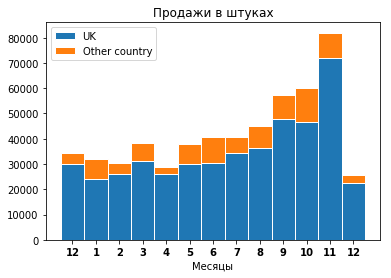

In [104]:
a = np.arange(1,13).tolist()
month_list = [12]+a
r = np.arange(13)
names = month_list
bar1 =  countries_sales['UK'].tolist()
bar2 = countries_sales['Other country'].tolist()
plt.bar(r, bar1,  edgecolor='white', width=1, label='UK')
plt.bar(r, bar2, bottom=bar1, edgecolor='white', width=1,label='Other country')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Месяцы")
plt.legend()
plt.title('Продажи в штуках')
plt.show()


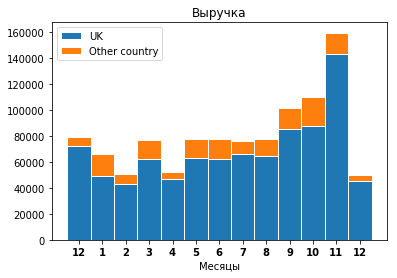

In [105]:
a = np.arange(1,13).tolist()
month_list = [12]+a
r = np.arange(13)
names = month_list
bar1 =  countries_turnover['UK'].tolist()
bar2 = countries_turnover['Other country'].tolist()
plt.bar(r, bar1,  edgecolor='white', width=1, label='UK')
plt.bar(r, bar2, bottom=bar1, edgecolor='white', width=1,label='Other country')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Месяцы")
plt.legend()
plt.title('Выручка')
plt.show()

In [215]:
# Количество чеков и активных покупателей,количество проданных артикулов,продажи в штуках и в деньгах помесячно

df[['mnth_yr','InvoiceNo','CustomerID','StockCode','Quantity','UnitSum']].groupby('mnth_yr',as_index=False).agg(
    {
        'InvoiceNo':pd.Series.nunique, 
        'CustomerID':pd.Series.nunique,
        'StockCode':pd.Series.nunique,
        'Quantity':pd.Series.sum,
        'UnitSum':pd.Series.sum
    }
)

,mnth_yr,InvoiceNo,CustomerID,StockCode,Quantity,UnitSum
0,2010-12,1024,685.0,1502,34466,79513.230
1,2011-01,776,572.0,1428,32069,66024.230
2,2011-02,769,581.0,1202,30330,50651.980
3,2011-03,1015,748.0,1347,38172,77141.400
4,2011-04,867,672.0,1226,28831,51989.050
5,2011-05,1128,826.0,1264,37749,77554.720
6,2011-06,1051,762.0,1379,40519,77615.360
7,2011-07,1021,738.0,1484,40656,76444.330
8,2011-08,938,719.0,1395,44928,77937.610
9,2011-09,1349,1029.0,1620,57179,101598.511


In [199]:
# Количество чеков и активных покупателей (MAU),количество проданных артикулов,продажи в штуках и в деньгах по дням недели

weekday = df[['weekday','InvoiceNo','CustomerID','StockCode','Quantity','UnitSum']].groupby('weekday',as_index=False).agg(
    {
        'InvoiceNo':pd.Series.nunique, 
        'CustomerID':pd.Series.nunique,
        'StockCode':pd.Series.nunique,
        'Quantity':pd.Series.sum,
        'UnitSum':pd.Series.sum
    }
)

weekday

,weekday,InvoiceNo,CustomerID,StockCode,Quantity,UnitSum
0,Friday,2119,1221.0,2225,83989,165818.750
1,Monday,2209,1285.0,2421,87232,177969.531
2,Sunday,1693,1017.0,1989,47178,82242.700
3,Thursday,2924,1607.0,2391,124669,231764.300
4,Tuesday,2470,1353.0,2387,99263,201187.590
5,Wednesday,2519,1408.0,2389,110292,197185.120


In [77]:
# Доля покупателей с повторными покупками
purchase_number = df[['InvoiceNo','CustomerID']].groupby('CustomerID').agg({'InvoiceNo':pd.Series.nunique})
purchase_number.InvoiceNo.value_counts()

1      1530
2       733
3       447
4       316
5       208
6       124
7        98
8        60
9        60
10       39
11       26
13       21
15       19
12       19
14       15
17       12
23        7
16        7
20        7
18        6
22        6
19        5
26        3
21        3
24        3
28        3
39        2
165       1
30        1
32        1
46        1
62        1
76        1
117       1
27        1
29        1
31        1
41        1
81        1
126       1
Name: InvoiceNo, dtype: int64

In [221]:
# Анализируем клиентов по когортам

# Формируем таблицу orders с датой заказа, ID клиента и суммой чека

orders = df[['UnitSum','InvoiceNo']]
orders = orders.groupby('InvoiceNo', as_index=False).agg({'UnitSum':pd.Series.sum})
orders = orders.merge(df[['InvoiceNo','CustomerID','InvoiceDate']], on='InvoiceNo',how='left').drop_duplicates('InvoiceNo')

In [220]:
orders.tail()

,InvoiceNo,UnitSum,CustomerID,InvoiceDate
53024,581585,60.54,15804.0,2011-12-09
53025,581585,60.54,15804.0,2011-12-09
53026,581585,60.54,15804.0,2011-12-09
53027,581587,40.00,12680.0,2011-12-09
53028,581587,40.00,12680.0,2011-12-09


In [145]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13934 entries, 0 to 53027
Data columns (total 4 columns):
InvoiceNo      13934 non-null object
UnitSum        13934 non-null float64
CustomerID     12953 non-null float64
InvoiceDate    13934 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 544.3+ KB


In [151]:
# Нам нужно получить таблицу Clients с датой прихода клиента
clients = orders.groupby('CustomerID', as_index=False).agg({'InvoiceDate' : 'min' })
clients.columns = ['CustomerID', 'First_receipt_date']
clients.tail()

,CustomerID,First_receipt_date
3787,18278.0,2011-09-27 11:58:00
3788,18281.0,2011-06-12 10:53:00
3789,18282.0,2011-08-05 13:35:00
3790,18283.0,2011-01-06 14:14:00
3791,18287.0,2011-05-22 10:39:00


In [163]:
# Объединяем таблицы Orders и Clients и округляем даты
Mix = pd.merge(orders[['CustomerID','UnitSum','InvoiceDate']], clients, how='left', on=['CustomerID'])
Mix['InvoiceDate'] = Mix['InvoiceDate'].dt.to_period('M')
Mix['First_receipt_date'] = Mix['First_receipt_date'].dt.to_period('M')
Mix.tail()

,CustomerID,UnitSum,InvoiceDate,First_receipt_date
13929,17581.0,66.90,2011-12,2010-12
13930,12748.0,22.63,2011-12,2010-12
13931,17581.0,17.34,2011-12,2010-12
13932,15804.0,60.54,2011-12,2011-05
13933,12680.0,40.00,2011-12,2011-08


In [200]:
# Находим число зказов и сумму по заказам, которые клиент сделал в этот временной промежуток
Preresult = Mix.groupby(['CustomerID', 'InvoiceDate', 'First_receipt_date'], as_index=False)
Preresult = Preresult.agg({ 'UnitSum': { 'total': 'sum', 'ordersCount': 'count' } })
Preresult.columns = Preresult.columns.droplevel()
Preresult.columns = ['clientID', 'InvoiceDate', 'First_receipt_date', 'total', 'ordersCount']
Preresult.to_excel(r'C:\Users\Dotsenko.Semen\Downloads\for_data.xlsx')
Preresult.tail()


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,clientID,InvoiceDate,First_receipt_date,total,ordersCount
10273,18283.0,2011-10,2011-01,16.87,1
10274,18283.0,2011-11,2011-01,83.82,3
10275,18283.0,2011-12,2011-01,7.02,1
10276,18287.0,2011-05,2011-05,115.20,1
10277,18287.0,2011-10,2011-05,43.68,1


In [ ]:
# Топ проданных артикулов помесячно и всего


In [ ]:
# Число позиций в чеке

In [ ]:
# Средняя стоимость позиции в чеке

In [ ]:
# Количество чеков помесячноё